# Descriptive Analysis of Vaccine-related Text Corpora

In this notebook, I'll go through a number of descriptive analyses of the three corpora. This will help get a better grasp of the data we are working with, and will help decisions about how to preprocess the data and which vector model to choose.

## 0. Loading and Preprocessing Corpora for Analysis

We begin by loading the required packages into the notebook, as well as the relevant custom functions from the utils file. 

In [1]:
# Standard library imports
import time
import json
import pickle
from collections import OrderedDict

# Third-party library imports
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Import custom util functions
from utils import *

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/fabianbeigang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/fabianbeigang/nltk_data...
[nltk_data]   Package words is already up-to-date!


Now, we can load the three corpora (ignoring those documents that have less than 100 words).

In [2]:
# Set the base directory and subdirectories of the corpora
base_dir = 'documents/raw'
subdirs = ['pseudoscience', 'search_engine', 'trusted_sources']

# Load the corpora
corpora, filtered_counts = load_corpora(base_dir, subdirs)

# Print the number of documents filtered out because they contained of less than 100 words
print('Filtered out because they contained less than 100 words:')
for subdir, count in filtered_counts.items():
    print(f"• {subdir}: {count} documents")

Filtered out because they contained less than 100 words:
• pseudoscience: 0 documents
• search_engine: 0 documents
• trusted_sources: 0 documents


To reduce processing times, we will already tokenize the copora before analyzing their properties.

In [ ]:
# # Timing the function
# corpora_tokenized = {}

# for j,subdir in enumerate(subdirs):
#     print(f"Processing {len(corpora[subdir])} documents")
#     print(f"Processing corpus {j+1} of {len(corpora)}")
#     start_time = time.time()
#     corpus_tokenized = []
#     for i,doc in enumerate(corpora[subdir]):
#         tokens = preprocess_document_for_analysis(doc)
#         corpus_tokenized.append(tokens)
#         if i % 1000 == 0:
#             print(f"Processed {i} documents in corpus {j+1} of {len(corpora)}")
#     corpora_tokenized[subdir] = corpus_tokenized
#     end_time = time.time()
#     elapsed_time = end_time - start_time
#     print("Time taken to process the documents in corpus:", elapsed_time, "seconds")

# # Specify the filename for the JSON file
# json_filename = 'data/corpora_tokenized_for_analysis.json'

# # Open the file in write mode and write the JSON data
# with open(json_filename, 'w', encoding='utf-8') as file:
#     json.dump(corpora_tokenized, file, ensure_ascii=False, indent=4)

# print(f"Corpora tokenized data stored in {json_filename}")

In [3]:
# # Specify the filename for the JSON file
json_filename = 'data/corpora_tokenized_for_analysis.json'

# Load the corpora tokenized data from the JSON file
with open(json_filename, 'r', encoding='utf-8') as file:
    corpora_tokenized = json.load(file)

## 1. Basic Properties of Copora and their Documents

As a first step, we will look at some basic properties of the documents, without looking at the content of the individual documents yet.

### 1.1 Number of documents per corpus

In [5]:
# Create a dictionary to store the number of documents in each corpus
doc_counts = { corpus:len(corpora_tokenized[corpus]) for corpus in corpora_tokenized }

# Print the number of documents in each corpus
print('Number of documents in each corpus:')
for corpus in doc_counts:
    doc_count = doc_counts[corpus]
    print(f"• {corpus}: {doc_count:,} documents")

Number of documents in each corpus:
• pseudoscience: 65,068 documents
• search_engine: 37,114 documents
• trusted_sources: 8,285 documents


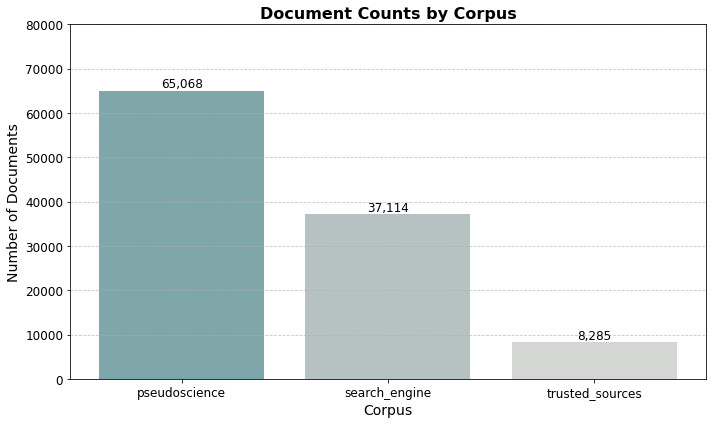

In [21]:
# Create the bar chart
plt.figure(figsize=(10, 6)) 
bars = plt.bar(doc_counts.keys(), doc_counts.values(), color=['#7FA6A9', '#B6C2C1', '#D3D6D2']) 

# Customize the appearance
plt.title('Document Counts by Corpus', fontsize=16, fontweight='semibold')
plt.xlabel('Corpus', fontsize=14)
plt.ylabel('Number of Documents', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 80000)  # Set the y-axis limits

# Add counts above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f"{yval:,}", ha='center', va='bottom', fontsize=12)

# Show the bar chart
plt.tight_layout()
plt.show()


We can see that the number of documents per corpus is distributed in a relatively uneven way. There are more than 65k documents in the "pseudoscience" corpus, while "search_engine" and "trusted_sources" have around 37k and 8k, respectively. We will later need to take this into consideration when creating vector embedding models for each of the corpora.

### 1.2 Length of documents

In [22]:
# Compute statistics for each corpus
stats = {}
for key, corpus in corpora.items():
    stats[key] = compute_statistics(corpus)

# Print the statistics
for key, (min_len, max_len, mean_len, median_len) in stats.items():
    print(f"{key} Corpus:")
    print(f"• Minimum Document Length: {min_len}")
    print(f"• Maximum Document Length: {max_len:,}")
    print(f"• Mean Document Length: {mean_len:,.1f}")
    print(f"• Median Document Length: {int(median_len):,}")
    print()

pseudoscience Corpus:
• Minimum Document Length: 100
• Maximum Document Length: 10,000
• Mean Document Length: 1,249.6
• Median Document Length: 768

search_engine Corpus:
• Minimum Document Length: 100
• Maximum Document Length: 10,000
• Mean Document Length: 1,169.8
• Median Document Length: 655

trusted_sources Corpus:
• Minimum Document Length: 100
• Maximum Document Length: 10,000
• Mean Document Length: 1,156.8
• Median Document Length: 765



In [23]:
# Print the first 100 words of the three longest documents in each corpus
for key, corpus in corpora.items():
    print(f"{key} Corpus:")
    print('•' * 80)
    for doc in sorted(corpus, key=lambda x: len(x.split()), reverse=True)[:3]:
        print(doc[:300])
        print(f"({len(doc.split()):,} words)")
        print()
    print()

pseudoscience Corpus:
••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••
Dr. Rob Williams and Brandon Zollino, dive deep into intellectual freedom and unity on Plan V TV. [00:00:00] Alex Tsakiris: On this episode of skeptiko, a rebroadcast of an interview I recently did with two brainiac tree huggers from Vermont. Oh, I hope you’ve love these guys as much as I do, becaus
(10,000 words)

even to its setting my name will be great among the nations.” (Mal. 1:11) Within Russia today, we see the truthfulness of that stunning prophecy spoken by Jehovah some 2,450 years ago. As the sun sets on Jehovah’s loyal ones in the western city of Kaliningrad, it is already rising 11 time zones to t
(10,000 words)

Chapter 1: The History That Is Prophecy The first book of the former prophets is Joshua. Why was this book written? It shows that God’s plan continued after Moses. Moses died just before Israel entered the Promised Land. Joshua led them to their final destination

### 1.3 Overall length of corpora

In [24]:
# Compute total words for each corpus
word_counts = {}
for key, corpus in corpora.items():
    word_counts[key] = total_words_in_corpus(corpus)

# Print the word counts with commas
for key, count in word_counts.items():
    print(f"• {key} Corpus: {count:,} words")

• pseudoscience Corpus: 81,309,843 words
• search_engine Corpus: 43,414,822 words
• trusted_sources Corpus: 9,584,388 words


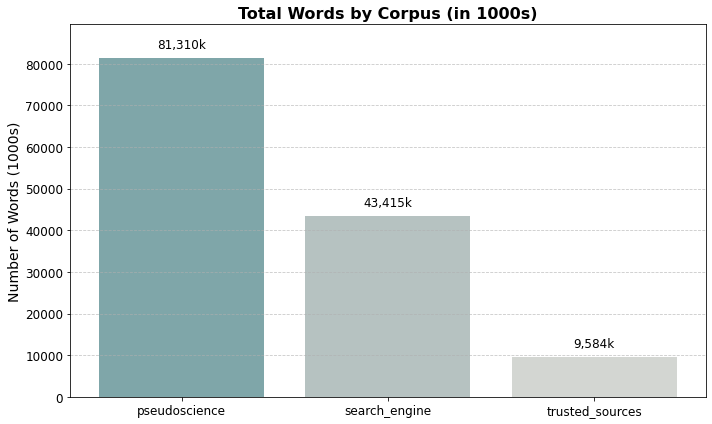

In [25]:
# Prepare the word counts in 1000s
word_counts_in_1000s = [word_counts[key] / 1000 for key in word_counts.keys()]

# Create the bar chart
plt.figure(figsize=(10, 6)) 
bars = plt.bar(word_counts.keys(), word_counts_in_1000s, color=['#7FA6A9', '#B6C2C1', '#D3D6D2']) 

# Customize the appearance
plt.title('Total Words by Corpus (in 1000s)', fontsize=16, fontweight='semibold')
plt.xlabel('')
plt.ylabel('Number of Words (1000s)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(word_counts_in_1000s) + 0.1 * max(word_counts_in_1000s))

# Add word counts in 1000s above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02 * max(word_counts_in_1000s), f"{yval:,.0f}k", ha='center', va='bottom', fontsize=12)

# Show the bar chart
plt.tight_layout()
plt.show()


The CAM corpus is notably the most expansive of the three, containing 93m words. This is significantly above the word counts of both the SE and YOUGOV corpora. In comparison, the SE corpus, with 7.4m, is the smallest of the three, containing roughly 8% of CAM's word count. The YOUGOV corpus is somewhat bigger, with a total of 12.8m words. This variation in corpus size highlights the differences in the volume of content available in each dataset. 

## 2. Distribution of Words

Next, we will look at the content of the documents. More specifically, we will look at frequencies of words and n-grams, and what the idiosyncratic terms in each corpus are.

### 2.1 Number of distinct words in each corpus

In [47]:
# Compute distinct words for each corpus
distinct_word_counts = {}
for key, corpus_tokenized in corpora_tokenized.items():
    distinct_word_counts[key] = distinct_words_in_corpus(corpus_tokenized)

# Print the distinct word counts
for key, count in distinct_word_counts.items():
    print(f"• {key} Corpus: {count:,} distinct words")


• pseudoscience Corpus: 342,194 distinct words
• search_engine Corpus: 353,723 distinct words
• trusted_sources Corpus: 117,436 distinct words


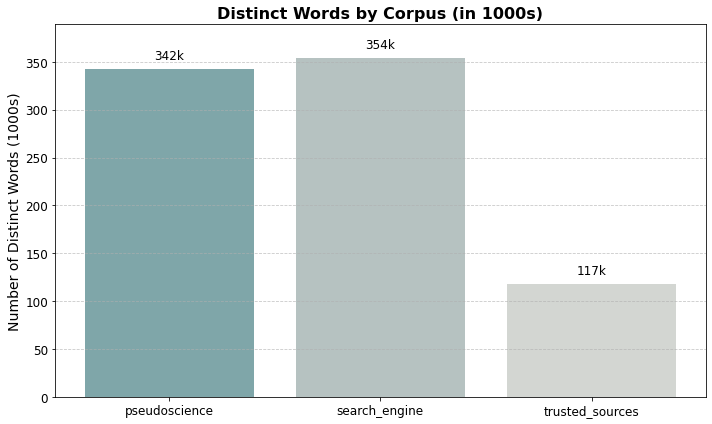

In [48]:
# Prepare the word counts in 1000s
distinct_word_counts_in_1000s = [distinct_word_counts[key] / 1000 for key in distinct_word_counts.keys()]

# Create the bar chart
plt.figure(figsize=(10, 6)) 
bars = plt.bar(distinct_word_counts.keys(), distinct_word_counts_in_1000s, color=['#7FA6A9', '#B6C2C1', '#D3D6D2']) 

# Customize the appearance
plt.title('Distinct Words by Corpus (in 1000s)', fontsize=16, fontweight='semibold')
plt.xlabel('')
plt.ylabel('Number of Distinct Words (1000s)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(distinct_word_counts_in_1000s) + 0.1 * max(distinct_word_counts_in_1000s))

# Add word counts in 1000s above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02 * max(distinct_word_counts_in_1000s), f"{yval:,.0f}k", ha='center', va='bottom', fontsize=12)

# Show the bar chart
plt.tight_layout()
plt.show()

After preprocessing the documents (i.e. lower-casing, removal of punctuation, and the removal of so-called "stop words", which are the most common words in the English language but which typically don't contain much semantic content), the "pseudoscience" corpus contains around 340k, the "search_engine" corpus around 355k, and the "trusted_sources" corpus around 115k distinct words.

### 2.2 Most frequent words

In [22]:
def ngram_frequency_in_corpus(corpus, n=1):
    """
    Calculate the frequency of n-grams in a corpus.

    Parameters:
    - corpus: A list of documents, each document is a list of sentences, and each sentence is a list of words.
    - n: The n-gram size (1 for unigrams, 2 for bigrams, 3 for trigrams).

    Returns:
    A Counter object with the frequency of each n-gram.
    """
    counter = Counter()
    for document in corpus:
        for sentence in document:
            if n == 1:
                # Unigrams: use the words as they are.
                counter.update(sentence)
            elif n == 2:
                # Bigrams: create bigrams from the sentence.
                counter.update(bigrams(sentence))
            elif n == 3:
                # Trigrams: create trigrams from the sentence.
                counter.update(trigrams(sentence))
    return counter

In [14]:
# Compute the top 50 most frequent words for each corpus
word_freqs = {}
for key, corpus in corpora_tokenized.items():
    word_freqs[key] = ngram_frequency_in_corpus(corpus, n=1)

# Create dictionaries to store the top 50 most frequent words for each corpus
most_common_words_50 = { key: word_freqs[key].most_common(50) for key in word_freqs.keys()}

In [15]:
# Save top 50 words to JSON file
with open('data/top50_words.json', 'w') as f:
    json.dump(most_common_words_50, f, indent=4)

# Store Counter object to pickle
with open('data/word_freqs.pkl', 'wb') as f:
    pickle.dump(word_freqs, f)

In [4]:
# Load the top 50 most frequent words for each corpus from JSON file
with open('data/top50_words.json', 'r') as f:
    most_common_words_50 = json.load(f)

# Load the Counter object from pickle
with open('data/word_freqs.pkl', 'rb') as f:
    word_freqs = pickle.load(f)

In [16]:
# Print the top 50 words for each corpus
for key, words in most_common_words_50.items():
    print(f"{key} Corpus:")
    for word, count in words:
        print(f"\t{word}: {count}")
    print("\n" + "-" * 50 + "\n")

pseudoscience Corpus:
	vaccine: 224975
	people: 194657
	covid: 183160
	health: 165543
	vaccines: 133759
	like: 129933
	new: 113206
	time: 110291
	world: 101332
	use: 95122
	children: 94467
	body: 87321
	said: 86961
	years: 83758
	system: 82901
	know: 78557
	study: 74253
	medical: 73144
	disease: 72493
	help: 72361
	found: 71869
	research: 69401
	life: 67571
	cancer: 66768
	year: 65843
	government: 65815
	human: 65406
	dr: 65403
	way: 65052
	public: 63968
	food: 63224
	immune: 60862
	data: 60850
	day: 57737
	blood: 56313
	need: 55537
	natural: 55480
	virus: 55228
	including: 53966
	high: 53582
	good: 52590
	water: 51566
	risk: 51500
	work: 51375
	right: 51063
	vaccination: 50546
	state: 49591
	information: 49491
	god: 48729
	long: 48530

--------------------------------------------------

search_engine Corpus:
	vaccine: 181875
	health: 120092
	people: 89146
	covid: 85362
	vaccines: 84059
	use: 83958
	vaccination: 77711
	treatment: 75648
	study: 74306
	patients: 65124
	disease: 62569
	ch

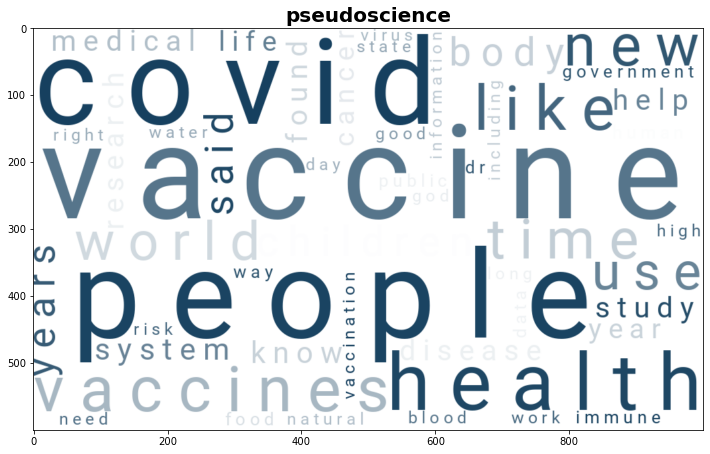

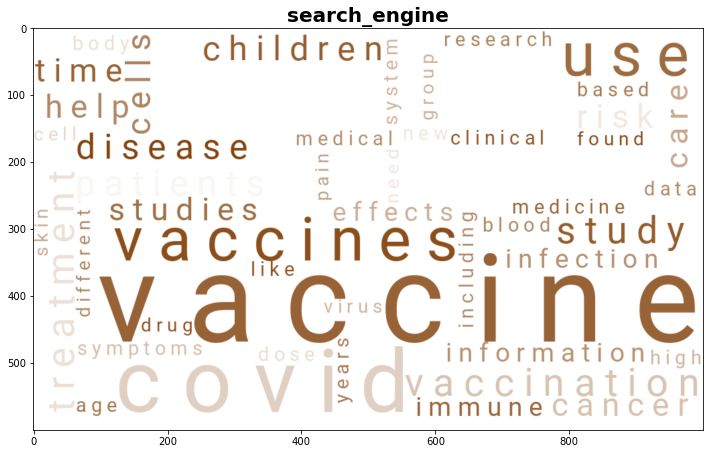

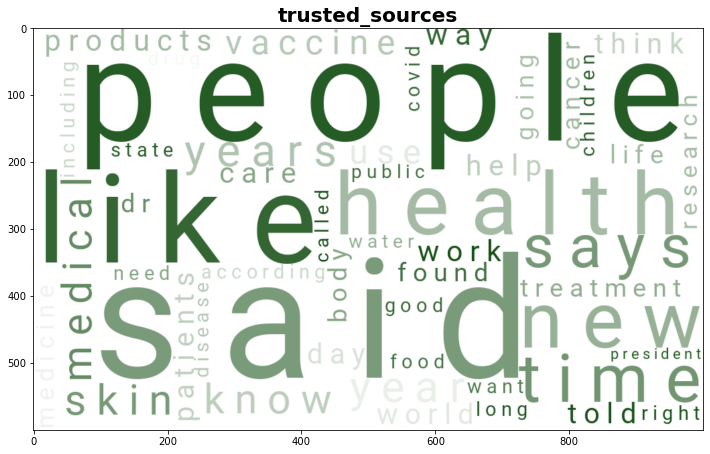

In [17]:
# Create the three wordclouds
create_wordclouds(most_common_words_50)

### 2.3 Most frequent bigrams

In [12]:
# Compute the frequency for bigrams
bigram_freqs = {}
for key, corpus in corpora_tokenized.items():
    bigram_freqs[key] = ngram_frequency_in_corpus(corpus, n=2)

# Create dictionaries to store the top 50 most frequent bigrams for each corpus
most_common_bigrams_50 = { key: bigram_freqs[key].most_common(50) for key in bigram_freqs.keys()}

In [13]:
# Save top 50 bigrams to JSON file
with open('data/top50_bigrams.json', 'w') as f:
    json.dump(most_common_bigrams_50, f, indent=4)

# Store Counter object to pickle
with open('data/bigram_freqs.pkl', 'wb') as f:
    pickle.dump(bigram_freqs, f)

In [5]:
# Load the JSON file containing the top 50 bigrams
with open('data/top50_bigrams.json', 'r') as f:
    most_common_bigrams_50 = json.load(f)

# Load the Counter object from pickle
with open('data/bigram_freqs.pkl', 'rb') as f:
    bigram_freqs = pickle.load(f)

In [15]:
# Print the top 50 bigrams for each corpus
for key, bigram_counts in most_common_bigrams_50.items():
    print(f"{key} Corpus:")
    for (word1, word2), count in bigram_counts:
        print(f"\t{word1} {word2}: {count}")
    print("\n" + "-" * 50 + "\n")

pseudoscience Corpus:
	immune system: 32551
	covid vaccines: 29849
	covid vaccine: 29684
	united states: 22873
	public health: 18377
	new york: 13960
	sars cov: 13405
	following covid: 12259
	year old: 12167
	et al: 11915
	long term: 10768
	adverse events: 10203
	clinical trials: 9901
	spike protein: 9626
	covid shots: 8350
	years ago: 8288
	big pharma: 8150
	heart disease: 7685
	essential oils: 7666
	climate change: 7648
	health care: 7633
	social media: 7115
	adverse reactions: 7089
	anti inflammatory: 6621
	pregnant women: 6615
	blood pressure: 6509
	fully vaccinated: 6410
	essential oil: 6344
	disease control: 6279
	world health: 6149
	study published: 5841
	year olds: 5828
	health benefits: 5784
	immune response: 5764
	pfizer covid: 5763
	vaccine safety: 5598
	food drug: 5447
	centers disease: 5434
	clinical trial: 5390
	mrna vaccines: 5372
	drug administration: 5232
	mainstream media: 5170
	health organization: 5159
	white house: 5116
	covid vaccination: 5099
	cancer cells: 5043


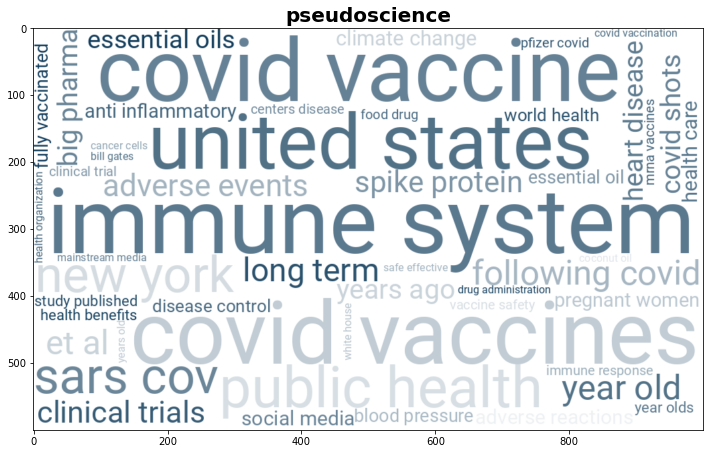

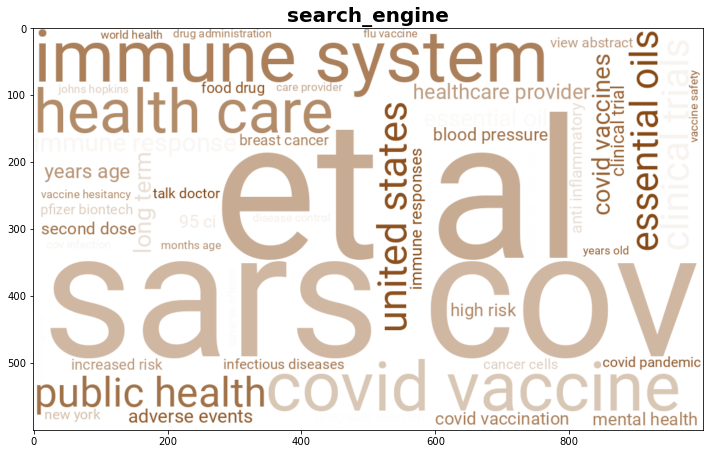

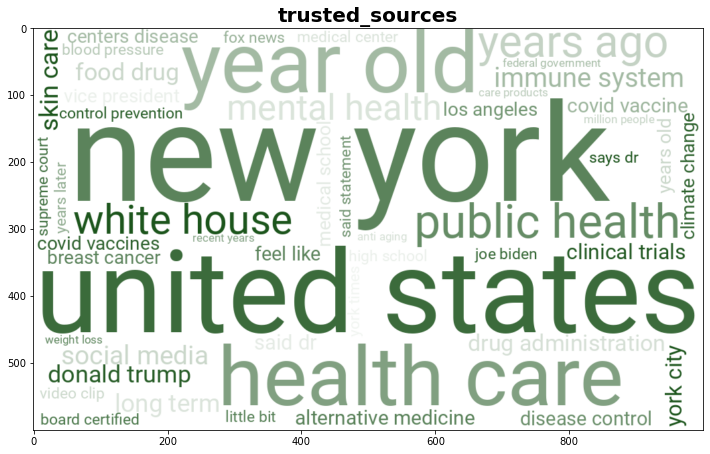

In [16]:
# Create the three wordclouds
create_wordclouds(most_common_bigrams_50)

Now, we can display all the bigrams that contain the word "vaccine".

In [17]:
# Find bigrams containing the word 'vaccin'
word_to_search = "vaccin"
ngrams_per_corpus_vaccin = ngram_containing_word(bigram_freqs, word_to_search)

In [18]:

# Find bigrams containing the stem 'vax'
word_to_search = "vax"
ngrams_per_corpus_vax = ngram_containing_word(bigram_freqs, word_to_search)

In [19]:
# # Store vaccin bigrams as json
# with open('data/vaccin_bigrams_per_corpus.json', 'w') as f:
#     json.dump(ngrams_per_corpus_vaccin, f, indent=4)

# # Load the JSON file containing the bigrams containing the word 'vaccin'
# with open('data/vaccin_bigrams_per_corpus.json', 'r') as f:
#     ngrams_per_corpus_vaccin = json.load(f)

In [20]:
# # Store vax bigrams as json
# with open('data/vax_bigrams_per_corpus.json', 'w') as f:
#     json.dump(ngrams_per_corpus_vax, f, indent=4)

# # Load the JSON file containing the bigrams containing the word 'vaccin'
# with open('data/vax_bigrams_per_corpus.json', 'r') as f:
#     ngrams_per_corpus_vax = json.load(f)

In [21]:
# Print the most frequent 10 bigrams containing "vaccin" in each corpus
for corpus in ngrams_per_corpus_vaccin:
    sorted_ngrams = ngrams_per_corpus_vaccin[corpus]
    print(f"Corpus: {corpus}")
    for i, (ngram, count) in enumerate(sorted_ngrams):
        if i < 10:
            print(f"N-gram: {' '.join(ngram)}, Frequency: {count}")
    print("----------")

Corpus: pseudoscience
N-gram: covid vaccines, Frequency: 29849
N-gram: covid vaccine, Frequency: 29684
N-gram: fully vaccinated, Frequency: 6410
N-gram: vaccine safety, Frequency: 5598
N-gram: mrna vaccines, Frequency: 5372
N-gram: covid vaccination, Frequency: 5099
N-gram: mrna vaccine, Frequency: 4091
N-gram: flu vaccine, Frequency: 3934
N-gram: vaccine injury, Frequency: 3593
N-gram: vaccine adverse, Frequency: 3557
----------
Corpus: search_engine
N-gram: covid vaccine, Frequency: 15654
N-gram: covid vaccines, Frequency: 9501
N-gram: covid vaccination, Frequency: 5285
N-gram: influenza vaccine, Frequency: 3934
N-gram: vaccine safety, Frequency: 3495
N-gram: flu vaccine, Frequency: 3241
N-gram: vaccine hesitancy, Frequency: 3179
N-gram: mrna vaccines, Frequency: 3084
N-gram: vaccine efficacy, Frequency: 2684
N-gram: vaccine effectiveness, Frequency: 2575
----------
Corpus: trusted_sources
N-gram: covid vaccine, Frequency: 718
N-gram: covid vaccines, Frequency: 623
N-gram: anti vacci

In [22]:
# Print the most frequent 10 bigrams containing "vax" in each corpus
for corpus in ngrams_per_corpus_vax:
    sorted_ngrams = ngrams_per_corpus_vax[corpus]
    print(f"Corpus: {corpus}")
    for i, (ngram, count) in enumerate(sorted_ngrams):
        if i < 10:
            print(f"N-gram: {' '.join(ngram)}, Frequency: {count}")
    print("----------")

Corpus: pseudoscience
N-gram: anti vaxxers, Frequency: 2067
N-gram: anti vaxxer, Frequency: 859
N-gram: covid vaxxed, Frequency: 780
N-gram: anti vax, Frequency: 545
N-gram: double vaxxed, Frequency: 451
N-gram: vaxxed boosted, Frequency: 412
N-gram: vaxxed double, Frequency: 385
N-gram: joke vaxxed, Frequency: 376
N-gram: vaxxers continue, Frequency: 376
N-gram: unvaxxed dying, Frequency: 376
----------
Corpus: search_engine
N-gram: moderna spikevax, Frequency: 208
N-gram: novavax vaccine, Frequency: 196
N-gram: novavax covid, Frequency: 175
N-gram: called zostavax, Frequency: 144
N-gram: anti vaxxers, Frequency: 135
N-gram: astrazeneca vaxzevria, Frequency: 121
N-gram: anti vax, Frequency: 115
N-gram: comirnaty spikevax, Frequency: 91
N-gram: flucelvax quad, Frequency: 85
N-gram: moderna novavax, Frequency: 72
----------
Corpus: trusted_sources
N-gram: anti vaxxers, Frequency: 123
N-gram: anti vax, Frequency: 94
N-gram: anti vaxxer, Frequency: 32
N-gram: anti vaxx, Frequency: 28
N-gr

### 2.4 Most frequent trigrams

In [4]:
# Compute the frequency for trigrams
trigram_freqs = {}
for key, corpus in corpora_tokenized.items():
    trigram_freqs[key] = ngram_frequency_in_corpus(corpus, n=3)

# Create dictionaries to store the top 50 most frequent trigrams for each corpus
most_common_trigrams_50 = { key: trigram_freqs[key].most_common(50) for key in trigram_freqs.keys()}

In [24]:
# # Save top 50 trigrams to JSON file
# with open('data/top50_trigrams.json', 'w') as f:
#     json.dump(most_common_trigrams_50, f, indent=4)

# # Store Counter object to pickle
# with open('data/trigram_freqs.pkl', 'wb') as f:
#     pickle.dump(trigram_freqs, f)

In [25]:
# # Load the JSON file containing the top 50 trigrams
# with open('data/top50_trigrams.json', 'r') as f:
#     most_common_trigrams_50 = json.load(f)

# # Load the Counter object from pickle
# with open('data/trigram_freqs.pkl', 'rb') as f:
#     trigram_freqs = pickle.load(f)

In [5]:
# Print the top 50 trigrams for each corpus
for key, trigram_counts in most_common_trigrams_50.items():
    print(f"{key} Corpus:")
    for (word1, word2, word3), count in trigram_counts:
        print(f"\t{word1} {word2} {word3}: {count}")
    print("\n" + "-" * 50 + "\n")

pseudoscience Corpus:
	following covid vaccines: 8204
	centers disease control: 5399
	food drug administration: 5134
	world health organization: 5027
	disease control prevention: 4606
	new york times: 3350
	pfizer covid vaccine: 3286
	emergency use authorization: 2971
	drug administration fda: 2798
	deaths following covid: 2797
	covid vaccines european: 2644
	control prevention cdc: 2477
	new world order: 2404
	new york city: 2349
	wuhan coronavirus covid: 2331
	injured following covid: 2271
	european database adverse: 2261
	vaccines european database: 2260
	database adverse reactions: 2260
	11 year olds: 2185
	bill melinda gates: 2165
	boost immune system: 2067
	national institutes health: 2047
	high blood pressure: 2041
	us food drug: 2036
	melinda gates foundation: 1967
	study published journal: 1882
	health human services: 1868
	children health defense: 1736
	world economic forum: 1733
	apple cider vinegar: 1685
	adverse event reporting: 1674
	following covid shots: 1658
	vaccine a

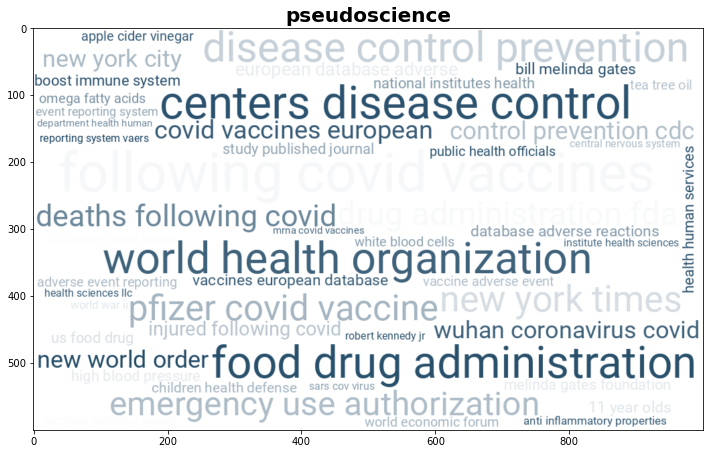

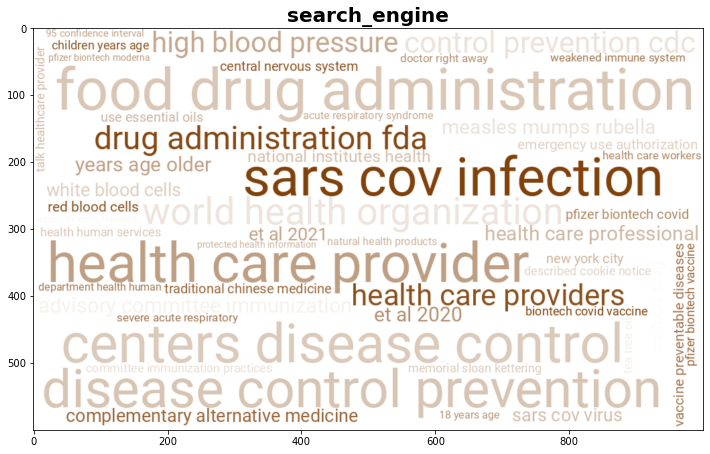

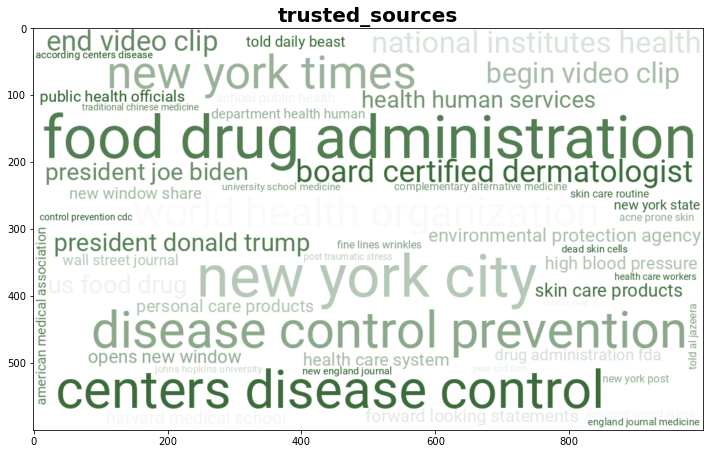

In [6]:
# Create the three wordclouds
create_wordclouds(most_common_trigrams_50)

In [7]:
# Find trigrams containing the word 'vaccin'
word_to_search = "vaccin"
trigrams_per_corpus = ngram_containing_word(trigram_freqs, word_to_search)

In [ ]:
# Display the trigrams containing the search term
for corpus in trigrams_per_corpus:
    sorted_trigrams= trigrams_per_corpus[corpus]
    print(f"Corpus: {corpus}")
    for ngram, count in sorted_trigrams:
        print(f"N-gram: {' '.join(ngram)}, Frequency: {count}")
    print("----------")

In [9]:
# Store as json
with open('data/vaccin_trigrams_per_corpus.json', 'w') as f:
    json.dump(trigrams_per_corpus, f, indent=4)

The frequency analysis indicates that all three corpora contain relevant texts. For instance, words like "vaccine(s)", "health", and "medical" are among the top 50 words in each corpus. This trend is also seen in bigrams and trigrams. Terms like "health care", "side effects", "immune system", and "food drug administration" rank in the top 50 for all three corpora. To highlight differences between the corpora, we will next use a metric that identifies words unique to a specific corpus.

### 2.5 Most idiosyncratic words in each corpus

We will now analyse which terms are the most idiosyncratic in each corpus. To this end, we will utilise the TdIdf metric. 

The TfIdf (Term Frequency-Inverse Document Frequency) metric is designed to highlight words that are frequent in a specific document (or, in this case, corpus) but not commonly used across all documents (or multiple corpora). In essence, it identifies terms that are significant and distinguishing for a particular document in the context of a larger collection of documents. When applied to entire corpora, TfIdf can help determine which words are the most idiosyncratic or distinctive to each corpus compared to others. Words with high TfIdf scores in a specific corpus indicate that they are relatively unique and prevalent in that corpus compared to others.

The TfIdf is calculated by multiplying two components: the Term Frequency (TF), which is the number of times a word appears in a specific document, and the Inverse Document Frequency (IDF), which diminishes the weight of words that occur frequently across multiple documents and increases the weight of words that are rare. Mathematically, IDF is typically calculated as the logarithm of the total number of documents divided by the number of documents containing the word. The result of this multiplication emphasizes words that are common in a specific document but not across all documents. In the context of comparing multiple corpora, TfIdf can be interpreted as identifying how idiosyncratic a word is to a particular corpus. Words with high TfIdf scores in one corpus signify that they are distinctively prevalent there compared to others.

In [13]:
# Flatten sentences in each document and then combine all documents in each corpus
combined_texts = []
for corpus_documents in corpora_tokenized.values():
    combined_corpus_text = ' '.join([' '.join([' '.join(sentence) for sentence in document]) for document in corpus_documents])
    combined_texts.append(combined_corpus_text)

# Compute the TF-IDF values treating each combined corpus as a document
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.85, max_features=10000)
tfidf_matrix = vectorizer.fit_transform(combined_texts)

# Feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Create a dictionary to hold top words for each corpus
top_words_dict = {}

for idx, corpus_name in enumerate(corpora_tokenized.keys()):
    row = tfidf_matrix[idx].toarray()[0]
    top_words_indices = row.argsort()[-100:][::-1]
    top_words = [(feature_names[i], row[i]) for i in top_words_indices]
    
    # Use an ordered dictionary to preserve order
    ordered_top_words = OrderedDict(top_words)
    top_words_dict[corpus_name] = ordered_top_words


In [15]:
# Save the dictionary to a JSON file
with open("data/top_tfidf_words_per_corpus.json", "w") as file:
    json.dump(top_words_dict, file, indent=4)

In [6]:
# # Load the dictionary from the JSON file
# with open("data/top_tfidf_words_per_corpus.json", "r") as file:
#     top_words_dict = json.load(file)

In [11]:
# Get a document count for each corpus (i.e. the number of documents within a corpus that a given word appears in)
doc_freqs = {}
for key, corpus in corpora_tokenized.items():
    doc_freqs[key] = doc_frequency_in_corpus(corpus)

In [20]:
# For each corpus, print top 20 words
for corpus_name, words_scores in top_words_dict.items():
    
    # Print the top 20 TF-IDF words for the current corpus
    print(f"\nTop 20 words in corpus {corpus_name}:")
    for word, score in list(words_scores.items())[:20]:

        # Get wordcount
        wordcount = word_freqs[corpus_name][word] 

        # Get document count
        doccount = doc_freqs[corpus_name][word]
        
        print(f"{word}: TfIdf: {score:.2f}, (Count: {wordcount}; Documents: {doccount})")
    print("\n" + "-" * 50 + "\n")


Top 20 words in corpus pseudoscience:
alex tsakiris: TfIdf: 0.13, (Count: 0; Documents: 0)
european database: TfIdf: 0.13, (Count: 0; Documents: 0)
database adverse: TfIdf: 0.10, (Count: 0; Documents: 0)
injured following: TfIdf: 0.10, (Count: 0; Documents: 0)
fetal deaths: TfIdf: 0.09, (Count: 0; Documents: 0)
injuries following: TfIdf: 0.09, (Count: 0; Documents: 0)
covid injection: TfIdf: 0.07, (Count: 0; Documents: 0)
channel brighteoncom: TfIdf: 0.07, (Count: 0; Documents: 0)
tsakiris tsakiris: TfIdf: 0.06, (Count: 0; Documents: 0)
website date: TfIdf: 0.06, (Count: 0; Documents: 0)
short code: TfIdf: 0.06, (Count: 0; Documents: 0)
arbitration agreement: TfIdf: 0.06, (Count: 0; Documents: 0)
sciences llc: TfIdf: 0.06, (Count: 0; Documents: 0)
action waiver: TfIdf: 0.06, (Count: 0; Documents: 0)
arbitration provision: TfIdf: 0.06, (Count: 0; Documents: 0)
health guideline: TfIdf: 0.06, (Count: 0; Documents: 0)
contaminant measurements: TfIdf: 0.05, (Count: 0; Documents: 0)
measure

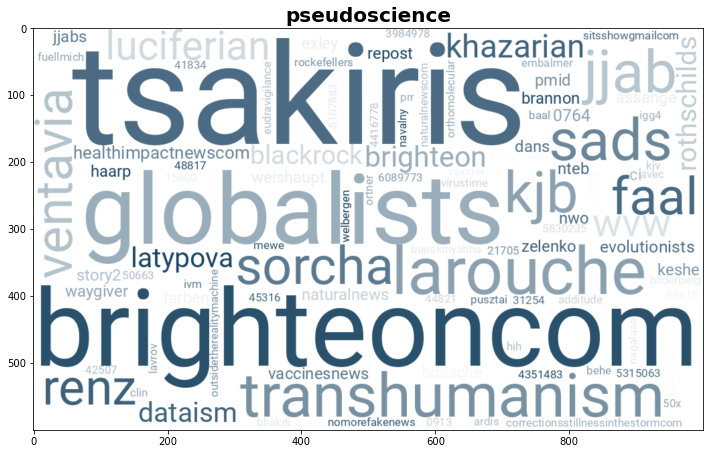

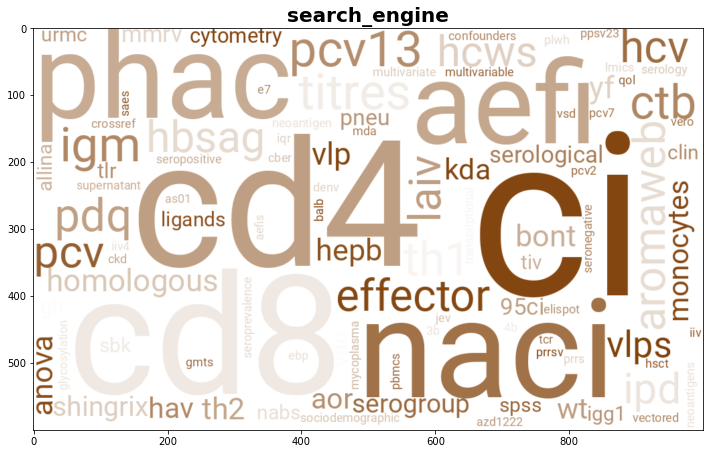

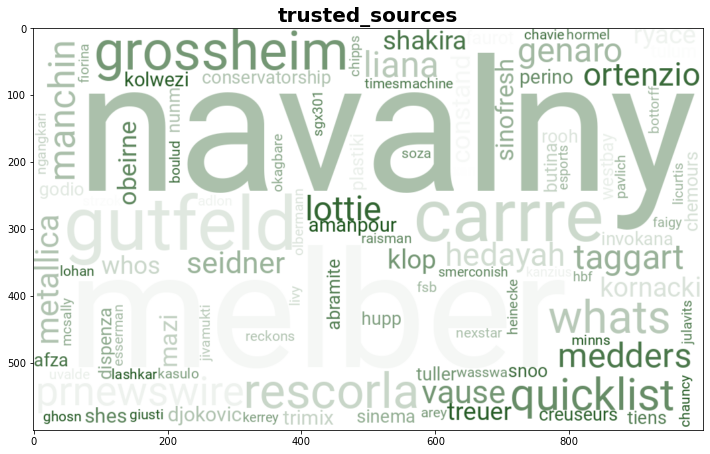

In [28]:
# Create the three wordclouds
create_wordclouds(top_words_dict, method="tfidf")

The words with high TfIDF scores in the "pseudoscience" corpus appear to reflect some of the common conspiracy theories. Words such as "tsakiris," "satan," "brighteon," "satanic," "wef" (possibly referring to the World Economic Forum), "chemtrails," "rothschild," and "globalists" are clearly associated with certain conspiracy narratives. The prevalence of these terms indicates that the "pseudoscience" corpus includes discussions that are critical of or opposed to mainstream views on vaccination, often intertwining vaccine skepticism with broader conspiratorial narratives.

The terms in the "search_engine" corpus appear somewhat unusual. The presence of these seemingly strange (as well as technical) terms in "search_engine"'s top 10 list might indicate that the rest of its vocabulary is fairly generic and shared with the other corpora. The distinctive words that stand out (and hence have high TfIdf scores) could be unique terminologies, abbreviations, or specific jargon not (or less) prevalent in the other corpora.

The "trusted_sources" corpus seems to touch on political and media figures as well as cultural references. Terms like "navalny" among others suggest that this corpus has content that merges vaccination discussions with broader political and media topics. It also includes terms like "shakira" and "metallica", which could indicate that there are subjects in this corpus extending beyond just the topic of vaccines.

In [ ]:
from itertools import chain
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer

# Improved bigram creation function
def create_bigrams(document):
    return [' '.join(pair) for sentence in document for pair in zip(sentence[:-1], sentence[1:])]

# Combining documents in each corpus
combined_texts = [' '.join(chain.from_iterable(create_bigrams(doc) for doc in corpus_docs))
                  for corpus_docs in corpora_tokenized.values()]

# Compute the TF-IDF values
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.85, max_features=10000, ngram_range=(2, 2))
tfidf_matrix = vectorizer.fit_transform(combined_texts)

# Extracting top bigrams
feature_names = vectorizer.get_feature_names_out()
top_words_dict = defaultdict(OrderedDict)

# Extracting top bigrams
feature_names = vectorizer.get_feature_names_out()
top_words_dict = defaultdict(OrderedDict)

for idx, corpus_name in enumerate(corpora_tokenized):
    row = tfidf_matrix[idx].toarray()[0]  # Convert to dense format
    top_indices = row.argsort()[::-1][:100]
    top_bigrams = {feature_names[i]: row[i] for i in top_indices}
    top_words_dict[corpus_name].update(top_bigrams)

In [9]:
# Save the dictionary to a JSON file
with open("data/top_tfidf_phrases_per_corpus.json", "w") as file:
    json.dump(top_words_dict, file, indent=4)

In [10]:
# Load the top TF-IDF words from the saved JSON file
with open("data/top_tfidf_phrases_per_corpus.json", "r") as file:
    top_phrases_dict = json.load(file)

In [21]:
# For each corpus, print top 20 words
for corpus_name, words_scores in top_words_dict.items():
    
    # Print the top 20 TF-IDF bigrams for the current corpus
    print(f"\nTop 20 bigrams in corpus {corpus_name}:")
    for word, score in list(words_scores.items())[:20]:

        # Get the individual words
        word_1 = word.split()[0]
        word_2 = word.split()[1]

        # Get word counts
        wordcount_1 = word_freqs[corpus_name][word_1]
        wordcount_2 = word_freqs[corpus_name][word_2]

        # Get document counts (in how many documents does the word appear)
        doccount_1 = doc_freqs[corpus_name][word_1]
        doccount_2 = doc_freqs[corpus_name][word_2]

        # Print
        print(f"{word}: {score:.2f} (Wordcount '{word_1}': {wordcount_1},'{word_2}': {wordcount_2}; Documents with word '{word_1}': {doccount_1},'{word_2}': {doccount_2})")
    print("\n" + "-" * 50 + "\n")


Top 20 bigrams in corpus pseudoscience:
alex tsakiris: 0.13 (Wordcount 'alex': 4876,'tsakiris': 2353; Documents with word 'alex': 1208,'tsakiris': 115)
european database: 0.13 (Wordcount 'european': 15970,'database': 7008; Documents with word 'european': 5818,'database': 2613)
database adverse: 0.10 (Wordcount 'database': 7008,'adverse': 30014; Documents with word 'database': 2613,'adverse': 9236)
injured following: 0.10 (Wordcount 'injured': 9269,'following': 43551; Documents with word 'injured': 3123,'following': 17383)
fetal deaths: 0.09 (Wordcount 'fetal': 5559,'deaths': 47015; Documents with word 'fetal': 1802,'deaths': 10347)
injuries following: 0.09 (Wordcount 'injuries': 13761,'following': 43551; Documents with word 'injuries': 4532,'following': 17383)
covid injection: 0.07 (Wordcount 'covid': 183160,'injection': 10652; Documents with word 'covid': 20317,'injection': 5053)
channel brighteoncom: 0.07 (Wordcount 'channel': 4392,'brighteoncom': 1517; Documents with word 'channel'

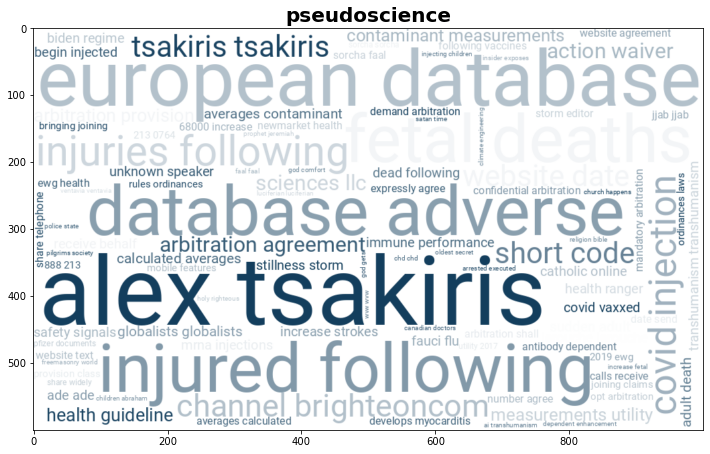

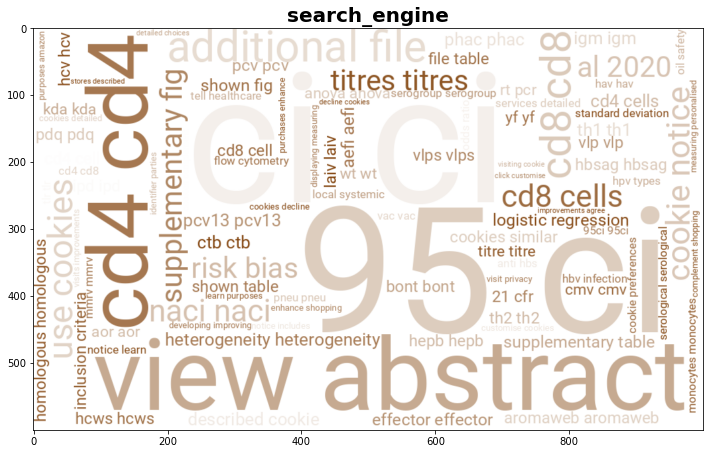

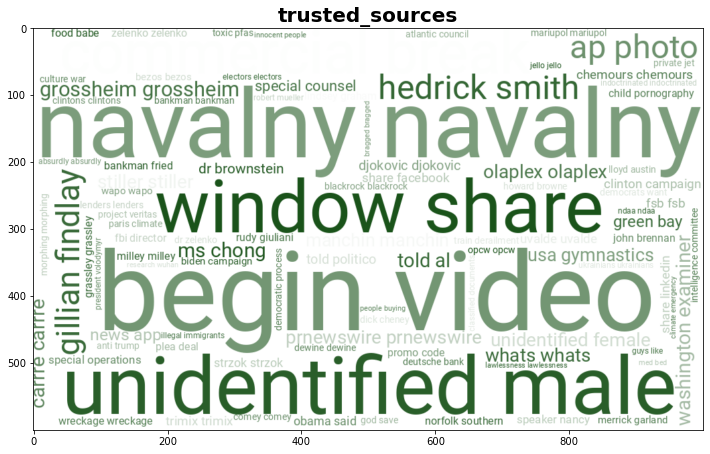

In [24]:
# Create the three wordclouds
create_wordclouds(top_words_dict, method="tfidf")

### 2.6 Named entity recognition

In [ ]:
# Get the entities and their counts for each corpus
entity_counts = {}
for name, corpus in corpora.items():
    entity_counts[name] = named_entity_recognition(corpus, sample_size=5000) # Note that this is sampled

In [6]:
# # Save to JSON
# with open("data/named_entities.json", "w") as file:
#     json.dump(entity_counts, file, indent=4)

In [7]:
# Reopen the JSON file
with open("data/named_entities.json", "r") as file:
    entity_counts = json.load(file)

In [ ]:
# Display the results (top 20 most common named entities)
for corpus_name, counts in entity_counts.items():
    print(corpus_name)
    for entity, count in list(counts.most_common())[:30]:
        print(f"{entity}: {count}")
    print("-" * 30)

For the named entity recognition, we sample 5000 documents from each corpus. This serves the purpose of limiting the computational time to run this analysis. For these 1500 documents, we extract and count all the named entities. This gives another perspective on themes and core topics of the different corpora.

## 3. Source comparison

In [26]:
import os

base_dir = 'documents/raw'
subdirs = ['pseudoscience', 'search_engine', 'trusted_sources']

def load_sources(base_dir, subdirs):
    """
    Load the sources for each corpus.
    """
    
    # Initialize the corpora and filtered_counts dictionaries
    corpora_domains = {}

    # For each subdirectory, load the corpus and count the number of filtered documents
    for subdir in subdirs:
        info = {}

        for filename in os.listdir(os.path.join(base_dir, subdir)):
            if filename.endswith('.json'):
                with open(os.path.join(base_dir, subdir, filename), 'r') as file:
                    data = json.load(file)
                    domain = data['domain']
                    if domain:
                        info[filename] = domain

        # Add the corpus and filtered count to the dictionaries
        corpora_domains[subdir] = info

    return corpora_domains

# Load the sources for each corpus
corpora_domains = load_sources(base_dir, subdirs)

In [27]:
# Now we will find the frequency of domains and list their corresponding filenames
domain_info = {subdir: {} for subdir in subdirs}
for subdir in corpora_domains:
    for filename, domain in corpora_domains[subdir].items():
        if domain in domain_info[subdir]:
            domain_info[subdir][domain]['count'] += 1
            domain_info[subdir][domain]['files'].append(filename)
        else:
            domain_info[subdir][domain] = {'count': 1, 'files': [filename]}

# To find overlaps, we need to compare the domains across each pair of subdirectories
overlaps_info = {}
for i in range(len(subdirs)):
    for j in range(i+1, len(subdirs)):
        key = f"{subdirs[i]}-{subdirs[j]}"
        overlaps_info[key] = {}
        domains_i = set(corpora_domains[subdirs[i]].values())
        domains_j = set(corpora_domains[subdirs[j]].values())
        common_domains = domains_i & domains_j
        for domain in common_domains:
            overlaps_info[key][domain] = {
                subdirs[i]: domain_info[subdirs[i]][domain]['files'],
                subdirs[j]: domain_info[subdirs[j]][domain]['files']
            }

In [28]:
print("\nOverlaps:")
for key, domains in overlaps_info.items():
    print(f"\n{key}: {len(domains)} common domains")
    for domain, files_info in domains.items():
        print(f" - {domain}")
        for sub, files in files_info.items():
            print(f"   - in {sub}: {files}")


Overlaps:

pseudoscience-search_engine: 1 common domains
 - translate.google.com
   - in pseudoscience: ['VAI305026.json', 'VAS348059.json', 'VAI319005.json', 'VCO143013.json', 'BIS012007.json', 'VCT344049.json', 'VAS226027.json', 'VEF309027.json', 'VEF222015.json', 'OST143003.json', 'NAT100014.json', 'BIS306011.json', 'BIS006044.json', 'VEF271027.json', 'VCO212049.json', 'VAI226074.json', 'VAI198025.json', 'VAI224049.json', 'VEF196019.json', 'VAP244012.json', 'VAS175040.json', 'VCO108041.json', 'BIS059055.json', 'VEF232015.json', 'VCT161030.json', 'VAS271056.json', 'NAT143026.json', 'VAI179030.json', 'VCT224029.json', 'VCT284033.json', 'VAS194055.json', 'NTT196013.json', 'VEF175031.json', 'VEF307039.json', 'VAI009050.json', 'BIS302052.json', 'NTT009078.json', 'BIS351060.json', 'VEF198007.json', 'BIS051035.json', 'VEF186019.json', 'VAS309056.json', 'VAI344029.json', 'VCO247005.json', 'VAS180016.json', 'VCO147050.json', 'VCO226003.json', 'NTT009097.json', 'OST311002.json', 'VAS218030.j

As expected, there is no overlap between pseudoscience and trusted sources, and only one domain (namely Google) between pseudoscience and search_engine.